In [3]:
import numpy as np
import pandas as pd

np.random.seed(123)

df = pd.DataFrame({'col1': np.random.randint(20, size=20), 
                   'col2': np.random.randn(20)})

df=df.append({'col1' : 50 ,  'col2' : 5.1245} , ignore_index=True) # outlier들을 추가한다. 

df

,col1,col2
0,13.0,1.730024
1,2.0,1.232650
2,2.0,-0.823598
3,6.0,-0.118201
4,17.0,-0.576103
5,19.0,1.695731
6,10.0,-0.074394
7,1.0,-1.900637
8,0.0,-0.777655
9,17.0,1.313462


## 1-4.데이터 분포 탐색
### 1-4-1.백분위수와 boxplot

In [36]:
import numpy as np

df['col1'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     0.0
0.25     2.0
0.50    10.0
0.75    15.0
0.95    19.0
Name: col1, dtype: float64

5% 백분위수는 0인 반면 95% 백분위수는 19에 달하는 등 변동폭이 있으며, 중간값은 10이다.  
추가했던 특잇값에 영향을 받지 않았다. 

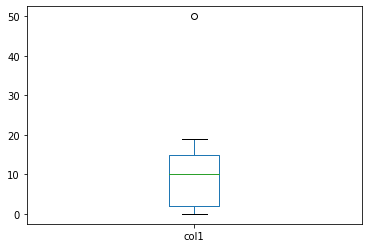

In [51]:
# box plot
import matplotlib.pyplot as plt

ax = (df['col1']).plot.box()

위의 boxplot에서 중간값이 약 10이고(굵은 수평선), 데이터의 절반이 약 2.5~15사이이며(상자의 위쪽과 아래쪽), 이상치(50)를 한눈에 알 수 있다. 점섬은 whisker라 부르며 데이터 전체 범위를 나타내주는 위아래 선들과 연결되어 있다. 

### 1-4-2.도수분표포와 히스토그램

In [55]:
import pandas as pd

binnedPopulation = pd.cut(df['col1'], 10)
binnedPopulation.value_counts()

(-0.05, 4.545]      8
(13.636, 18.182]    6
(4.545, 9.091]      2
(9.091, 13.636]     2
(18.182, 22.727]    2
(45.455, 50.0]      1
(22.727, 27.273]    0
(27.273, 31.818]    0
(31.818, 36.364]    0
(36.364, 40.909]    0
(40.909, 45.455]    0
Name: col1, dtype: int64

In [57]:
print(df['col1'].min(), df['col1'].max())


0.0 50.0


col1 컬럼에서 가장 작은 값은 0, 가장 큰 값은 50이다. 이를 통해 범위가 50-0=50이라는 것을 알 수 있다. 이를 균일한 크기로 10개로 나누려면 각 구간의 크기가 5가 되어야 한다.  
구간의 범위가 너무 크면, 분포를 나타내는 중요한 특징을 놓칠 수 있다. 반대로 너무 작아도, 결과가 너무 쪼개져 있어 더 큰 그림을 볼 수 없다. 

히스토그램은 도수분포표를 시각화하는 방법이다. x축엔 구간들을, y축엔 해당 구간별 데이터의 개수를 표시한다. 

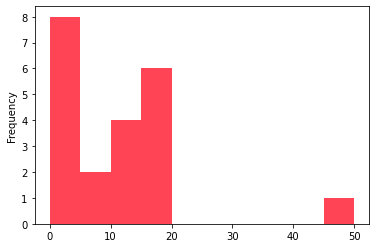

In [60]:
import matplotlib.pyplot as plt

ax = (df['col1']).plot.hist(color='#FF4455') # hist의 키워드 인수 bins를 사용해 구간의 개수를 정의할 수 있다. 

> 통계학 이론에서, 위치와 변이는 각각 분포의 일,이차 모멘트(적률)라고 한다. 삼차, 사차 모멘트는 각각 왜도skewness, 첨도kurtosis라고 부른다. 왜도는 데이터가 큰 값이나 작은 값 쪽으로 얼마나 비스듬히 쏠려 있는지를 나타내고, 첨도는 데이터가 극단 값을 갖는 경향성을 나타낸다.

### 1-4-3.밀도 그림과 추정
커널밀도추정을 통해 데이터로부터 직접 계산한다. 

<AxesSubplot:ylabel='Density'>

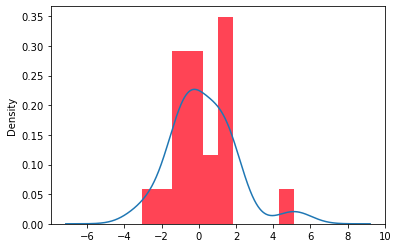

In [84]:
ax = (df['col2']).plot.hist(density=True, color='#FF4455') #, xlim=[0,20], bins=range(0,20),)
df['col2'].plot.density(ax=ax)

히스토그램과의 가장 큰 차이는 y축 값의 단위이다. 밀도 그림에선 개수가 아닌 비율을 표시한다. 밀도 곡선 아래의 총면적은 1이고 구간의 개수 대신 x축의 두 점 사이의 곡선 아래 면적을 계산하며, 이는 두 점 사이에 있는 분포의 비율에 해당한다. 

## 1-6.상관관계
상관행렬은 여러가지 변수들 사이의 관계를 시각화하는 데 사용한다. 

In [46]:
import pandas as pd

df = pd.DataFrame({'col1': np.linspace(0,11,100), 
                   'col2': np.random.randn(100),
                   'col3':np.linspace(0,50,100)})

df

,col1,col2,col3
0,0.000000,1.086104,0.000000
1,0.111111,0.366662,0.505051
2,0.222222,0.070841,1.010101
3,0.333333,0.317433,1.515152
4,0.444444,-0.278795,2.020202
...,...,...,...
95,10.555556,-0.083204,47.979798
96,10.666667,-0.260898,48.484848
97,10.777778,0.110793,48.989899
98,10.888889,-1.192275,49.494949


### 1-6-1.상관계수

In [40]:
df.corr()

,col1,col2,col3
col1,1.000000,-0.074653,1.000000
col2,-0.074653,1.000000,-0.074653
col3,1.000000,-0.074653,1.000000


### 1-6-2.상관행렬

<AxesSubplot:>

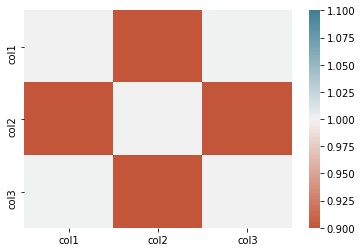

In [41]:
import seaborn as sns

sns.heatmap(df.corr(), vmin=1, cmap=sns.diverging_palette(20,220, as_cmap=True))

### 1-6-3.산점도
두 변수 사이의 관계를 시각화하는 가장 기본은 산점도를 그려보는 것이다. 

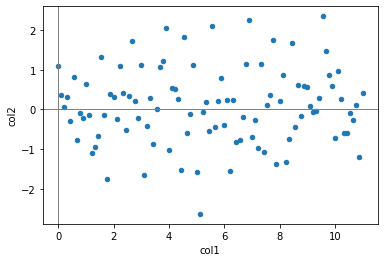

In [48]:
ax = df.plot.scatter(x='col1', y='col2')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

## 1-7.다변량분석

In [110]:
import pandas as pd

df = pd.DataFrame({'col1': np.random.randn(1000), 
                   'col2': np.random.randn(1000)})

df

,col1,col2
0,1.324547,-0.582811
1,-1.238687,0.218885
2,0.628129,0.735435
3,-0.172782,-1.042106
4,-0.576084,1.281943
...,...,...
995,1.827925,-0.267896
996,0.084964,0.401564
997,0.049876,0.180409
998,-1.155909,0.590263


### 1-7-1.hexagonal binning
산점도는 데이터의 개수가 상대적으로 적을 떄는 괜찮지만 데이터의 개수가 많아진다면 한 눈에 보기 힘들다. 따라서 hexagonal binning을 이용한다.   
이는 col1과 col2간의 관계를 나타내는데 그림을 육각형 모양의 구간들로 나누고 각 구간에 포함된 기록값의 개수에 따라 색깔을 표시한다. 

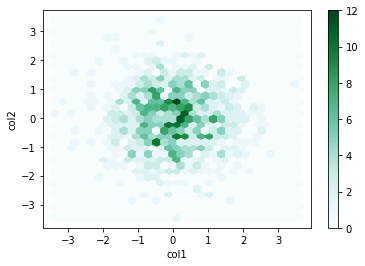

In [44]:
ax = df.plot.hexbin(x='col1', y='col2', gridsize=30, sharex=False)

### 1-7-2.contour plot
두 수치형 변수 사이의 관계를 시각화하기 위해 산점도 위에 등고선을 사용, 꼭대기 쪽으로 갈수록 밀도가 높아진다. 

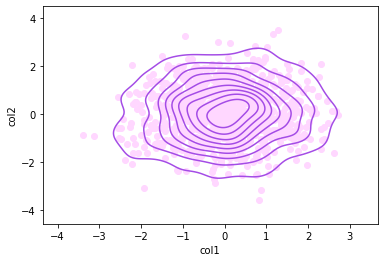

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(data=df, x='col1',y='col2', color='#A44CE6')
plt.scatter(data=df, x='col1',y='col2', color='#FFD7FF')

### 1-7-3.분할표
분할표는 두 범주형 변수를 요약하는 데 효과적인 방법으로, 범주별 빈도수를 기록한 표다.  
분할표를 통해 각 열의 빈도나 전체 백부율을 볼 수 있다. 

In [134]:
df = pd.DataFrame({
    'gender' : ['male','female','male','male','female','female','male'],
    'height' : [175,165,180,169,188,161,192],
    'nation' : ['USA','Korea','China','Korea','USA','China','Korea']
})

df

,gender,height,nation
0,male,175,USA
1,female,165,Korea
2,male,180,China
3,male,169,Korea
4,female,188,USA
5,female,161,China
6,male,192,Korea


In [135]:
contingency_table

nation,China,Korea,USA,All
gender,,,,
female,1,1,1,3
male,1,2,1,4
All,2,3,2,7


In [136]:
contingency_table = pd.pivot_table(df, values='height' ,index='gender', columns='nation',
aggfunc=lambda x:len(x), margins=True) # aggfunc를 이용해 빈도수 구하기

ct = contingency_table.loc['female':'male'].copy()
ct.loc[:, 'China':'USA'] = ct.loc[:, 'China':'USA'].div(ct['All'], axis=0)
ct['All'] = ct['All'] / sum(ct['All'])
ct

nation,China,Korea,USA,All
gender,,,,
female,0.333333,0.333333,0.333333,0.428571
male,0.250000,0.500000,0.250000,0.571429


### 1-7-4.Violin plot
box plot을 보완한 형태로, y축을 따라 밀도추정 결과를 동시에 시각화한다. 밀도 분포 모양을 좌우대칭으로 표현함으로써 데이터의 분포를 볼 수 있다. 

D:\Program Files\Anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


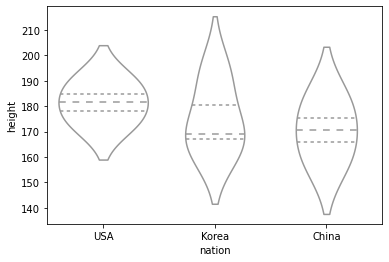

In [137]:
ax = sns.violinplot(df['nation'], df['height'], inner='quartile', color='white')